># Group 2 - Course 9B
  - Rizma Nurpriyanti (Universitas Pendidikan Indonesia)
  - Jasmine Noor Fawzia (Universitas Pendidikan Indonesia)
  - Seth Junior Nti (Universitas Pendidikan Indonesia)
  - Muhammad Syah Bin Razak Kolej (Poly-Tech Mara Batu Pahat)
  - Huzaifa Asad (University of Swabi)

In [16]:
import pandas as pd

# Load data
data = pd.read_excel('/Data_Timbulan_Sampah_SIPSN_KLHK_Bali&NTB_2022.xlsx')

# Display the first few rows of the dataframe
data

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2022,Bali,Kab. Jembrana,162.94,59472.92
1,2022,Bali,Kab. Badung,327.33,119474.58
2,2022,Bali,Kab. Gianyar,538.90,196698.50
3,2022,Bali,Kab. Klungkung,103.13,37643.55
4,2022,Bali,Kab. Bangli,111.88,40836.05
5,2022,Bali,Kab. Karangasem,311.54,113711.83
6,2022,Bali,Kab. Buleleng,392.56,143283.67
7,2022,Bali,Kota Denpasar,866.61,316312.65
8,2022,Nusa Tenggara Barat,Kab. Lombok Barat,288.59,105336.08
9,2022,Nusa Tenggara Barat,Kab. Lombok Tengah,419.90,153263.50


In [43]:
# number 1
# Calculate total annual waste generation for each province in each year
total_annual_waste = data.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan(ton)'].sum().reset_index()

# Display the result
total_annual_waste


,Tahun,Provinsi,Timbulan Sampah Tahunan(ton)
0,2022,Bali,1027433.75
1,2022,Nusa Tenggara Barat,814803.96


In [21]:
# number 2
# Calculate average total annual waste generation for each province for all years
average_annual_waste = total_annual_waste.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()

# Display the result
average_annual_waste

,Provinsi,Timbulan Sampah Tahunan(ton)
0,Bali,1027433.75
1,Nusa Tenggara Barat,814803.96


In [24]:
# number 3
# Find the province with the most annual waste generation each year
max_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]

# Display the results
max_annual_waste

,Tahun,Provinsi,Timbulan Sampah Tahunan(ton)
0,2022,Bali,1027433.75


In [25]:
# number 4
# Find the province with the least annual waste generation each year
min_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]

# Display the results
min_annual_waste

,Tahun,Provinsi,Timbulan Sampah Tahunan(ton)
1,2022,Nusa Tenggara Barat,814803.96


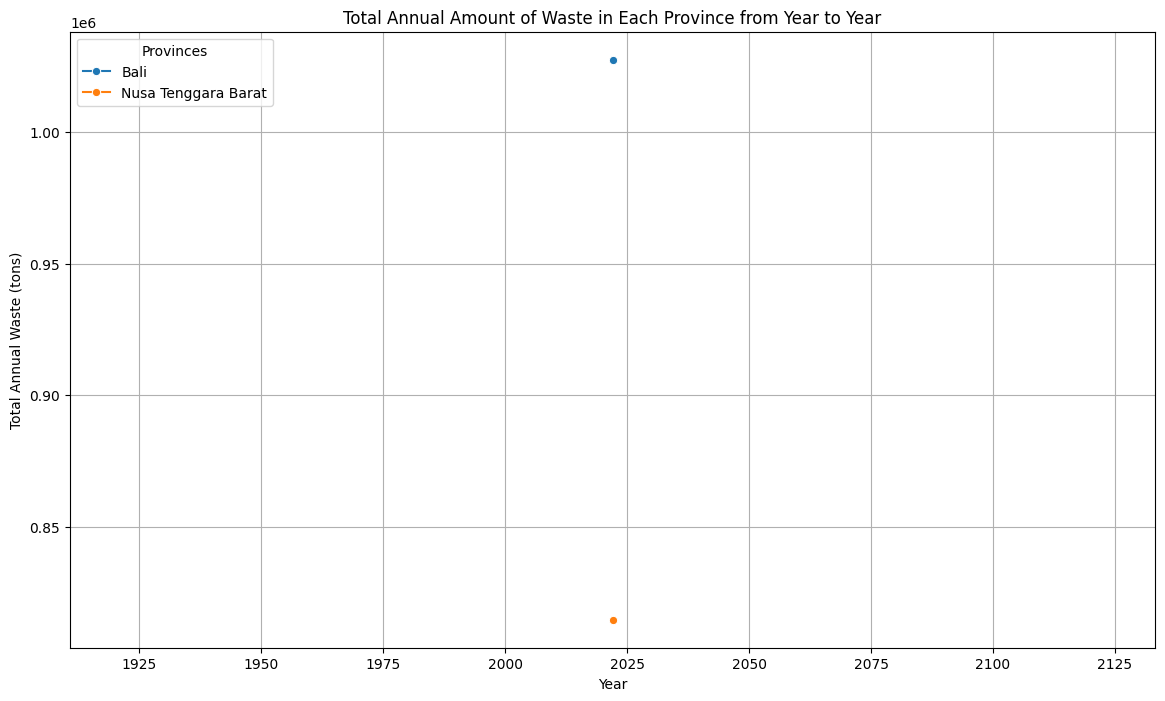

In [34]:
# number 5
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the total annual amount of waste in each province from year to year
plt.figure(figsize=(14, 8))
sns.lineplot(data=total_annual_waste, x='Tahun', y='Timbulan Sampah Tahunan(ton)', hue='Provinsi', marker='o')
plt.title('Total Annual Amount of Waste in Each Province from Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Annual Waste (tons)')
plt.legend(title='Provinces', loc='upper left')
plt.grid(True)
plt.show()

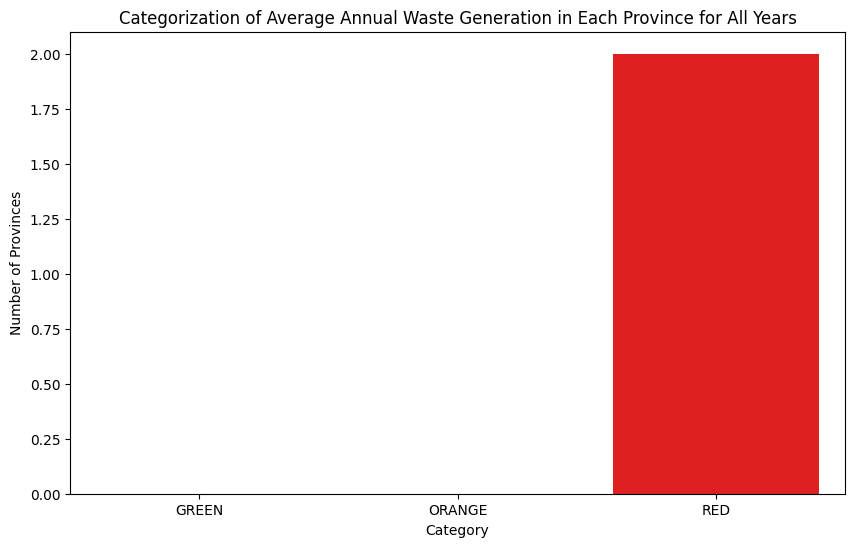

In [42]:
# number 6
# Categorize provinces based on average annual waste generation
def categorize_waste_generation(row):
    if row['Timbulan Sampah Tahunan(ton)'] <= 100000:
        return 'GREEN'
    elif 100000 < row['Timbulan Sampah Tahunan(ton)'] <= 700000:
        return 'ORANGE'
    else:
        return 'RED'

average_annual_waste['Category'] = average_annual_waste.apply(categorize_waste_generation, axis=1)

# Plot the categorization of average annual waste generation
category_counts = average_annual_waste['Category'].value_counts().reindex(['GREEN', 'ORANGE', 'RED'])
category_data = pd.DataFrame({'Category': category_counts.index, 'Number of Provinces': category_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(data=category_data, x='Category', y='Number of Provinces', palette={'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}, hue='Category', dodge=False)
plt.title('Categorization of Average Annual Waste Generation in Each Province for All Years')
plt.xlabel('Category')
plt.ylabel('Number of Provinces')
plt.show()